1.DOWNLOAD THE DATASET

In [3]:
import pandas as pd
import numpy as np

2. LOAD THE DATASET

In [4]:

df = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3.VISUALIZATION


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

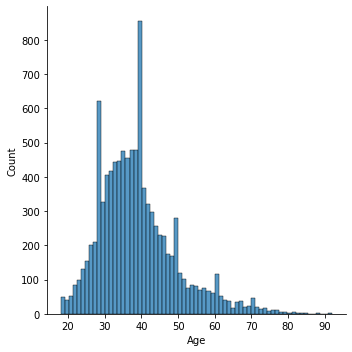

In [7]:

#Univariate Analysis
sns.displot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


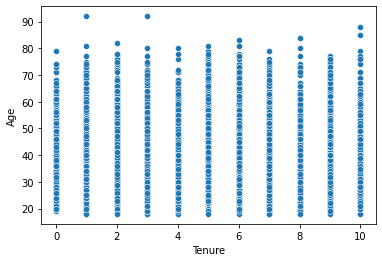

In [8]:
#Bivariate Analysis
sns.scatterplot(df['Tenure'],df['Age'])

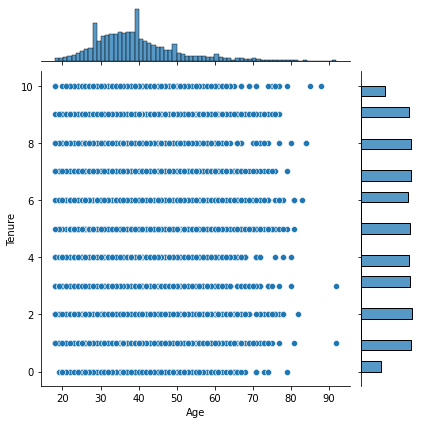

In [9]:
#Multivariate Analysis
sns.jointplot(x='Age',y='Tenure',data=df)

4. Perform descriptive statistics on the dataset.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


5. Handle the Missing values

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

6. Find the outliers and replace the outliers


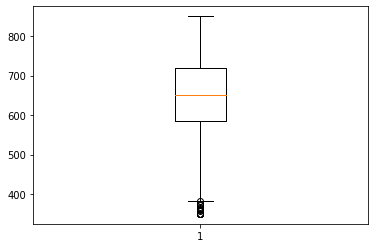

In [12]:
plt.boxplot(df["CreditScore"])
plt.show()

7. Check for Categorical columns and perform encoding.

In [15]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


8.Split the data into dependent and independent variables.

In [16]:
x = df.iloc[:,0:13].values;
y = df.iloc[:,13:14].values;

In [18]:
x

array([[1, 15634602, 'Hargrave', ..., 1, 1, 101348.88],
       [2, 15647311, 'Hill', ..., 0, 1, 112542.58],
       [3, 15619304, 'Onio', ..., 1, 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 0, 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 1, 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 1, 0, 38190.78]], dtype=object)

In [19]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

9. Scale the independent values


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit_transform(y)

array([[ 1.97716468],
       [-0.50577476],
       [ 1.97716468],
       ...,
       [ 1.97716468],
       [ 1.97716468],
       [-0.50577476]])

10. Split the data into training and testing

In [22]:
from sklearn.model_selection import  train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')